In [21]:
import pandas as pd

import matplotlib.pyplot as plt

import geopandas as gpd

tree_data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da?q=&sort=neighborhood+asc&fields=id%2Caddress_number%2Cstreet%2Ccommon_name%2Cscientific_name%2Cheight%2Cwidth%2Cgrowth_space_length%2Cgrowth_space_width%2Cgrowth_space_type%2Cdiameter_base_height%2Cstems%2Coverhead_utilities%2Cland_use%2Ccondition%2Cstormwater_benefits_dollar_value%2Cstormwater_benefits_runoff_elim%2Cproperty_value_benefits_dollarvalue%2Cproperty_value_benefits_leaf_surface_area%2Cenergy_benefits_electricity_dollar_value%2Cenergy_benefits_gas_dollar_value%2Cair_quality_benfits_o3dep_dollar_value%2Cair_quality_benfits_o3dep_lbs%2Cair_quality_benfits_vocavd_dollar_value%2Cair_quality_benfits_vocavd_lbs%2Cair_quality_benfits_no2dep_dollar_value%2Cair_quality_benfits_no2dep_lbs%2Cair_quality_benfits_no2avd_dollar_value%2Cair_quality_benfits_no2avd_lbs%2Cair_quality_benfits_so2dep_dollar_value%2Cair_quality_benfits_so2dep_lbs%2Cair_quality_benfits_so2avd_dollar_value%2Cair_quality_benfits_so2avd_lbs%2Cair_quality_benfits_pm10depdollar_value%2Cair_quality_benfits_pm10dep_lbs%2Cair_quality_benfits_pm10avd_dollar_value%2Cair_quality_benfits_pm10avd_lbs%2Cair_quality_benfits_total_dollar_value%2Cair_quality_benfits_total_lbs%2Cco2_benefits_dollar_value%2Cco2_benefits_sequestered_lbs%2Cco2_benefits_sequestered_value%2Cco2_benefits_avoided_lbs%2Cco2_benefits_avoided_value%2Cco2_benefits_decomp_lbs%2Cco2_benefits_maint_lbs%2Cco2_benefits_totalco2_lbs%2Coverall_benefits_dollar_value%2Cneighborhood%2Ccouncil_district%2Cward%2Ctract%2Cpublic_works_division%2Cpli_division%2Cpolice_zone%2Cfire_zone%2Clatitude%2Clongitude&filters=%7B%7D&format=csv")

The First thing I did was importing Pandas file as pd so that it could be easier to use and I wouldnt have to write out pandas each time I needed it. I then had pandas read the values of my data set and assign the dataset to a variable called tree_data

In [22]:
tree_data.head()

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,35765343,906,BRIGHTON RD,Vacant Site Medium,Vacant Site Medium,NaN,NaN,NaN,NaN,Well or Pit,...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.452689,-80.013998
1,81221383,NaN,NaN,London planetree,Platanus x acerifolia,0.0,0.0,0.0,0.0,Open or Unrestricted,...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.454111,-80.002840
2,1091700090,720,ARCH ST,London planetree,Platanus x acerifolia,45.0,15.0,6.0,4.0,Well or Pit,...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.452599,-80.008822
3,1436614028,NaN,NaN,London planetree,Platanus x acerifolia,0.0,0.0,0.0,0.0,Open or Unrestricted,...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453348,-80.002244
4,2121692709,720,ARCH ST,Maple: Freeman,Acer x freemanii,30.0,8.0,8.0,4.0,Well or Pit,...,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-7,40.452397,-80.008766


Each one of these rows indicates a tree that belongs to a neighborhood. So im going to make a dictionary that finds reads through all the neighborhoods and adds the total amount of trees it finds from each neighborhood to it.


In [23]:
tree_count = dict()

for index, row in tree_data.iterrows():
    neighborhood = row["neighborhood"]
    if neighborhood in tree_count:
        tree_count[neighborhood] = tree_count[neighborhood] + 1
    else:
        tree_count[neighborhood] = 1



now that I have a dictionary with every neighborhood and all of the trees in it, im going to make a dataframe first out of that and print out the first 10 neighborhoods with the highest number of trees in each 


In [24]:
tree_data = pd.DataFrame(list(tree_count.items()),columns = ['neighborhood', 'trees'])
tree_data.sort_values(by = 'trees', ascending = False)

,neighborhood,trees
76,Squirrel Hill South,5073
39,Highland Park,2941
75,Squirrel Hill North,2083
71,South Side Flats,1693
67,Shadyside,1558
...,...,...
4,Arlington Heights,5
30,Esplen,3
35,Glen Hazel,2
70,South Shore,2


next Im going to plot this data onto a graph only including the first 20 highest neighborhoods with trees

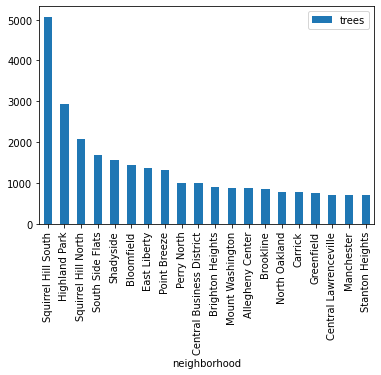

In [25]:
tree_data.sort_values(by=['trees'], ascending=False).head(20).plot.bar(x='neighborhood', y='trees')

Next im going to create a geological map of the area so that the visuals can be a little bit more clear as to which neighborhood the winner is. Im first going to read the shapefile and get a map of the pittsburgh neighborhoods.


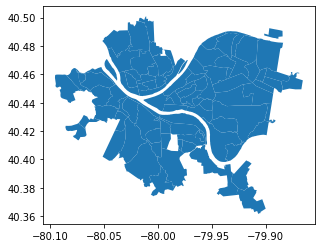

In [26]:
areas = gpd.read_file('https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip')
areas.plot()


Im going to now merge the data into a new dataset that is going to fill in this chart with the appropriate colors. I must also make sure that I put that all values of N/A are equal to 0.


In [27]:
map = areas.merge(tree_data, how='left', left_on='hood', right_on='neighborhood')
map = map.fillna(0)

Now all we have to do is plot the map one more time and it should be filled in with the correct colors proprtional to how many trees are in each neighborhood

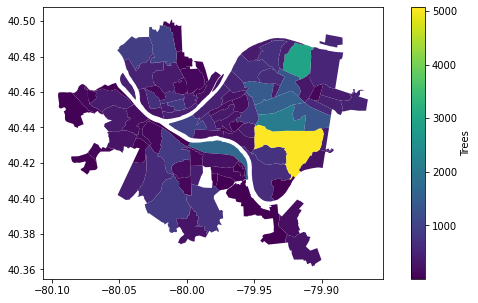

In [29]:
map.plot(column='trees', legend=True, legend_kwds={'label': 'Trees'}, figsize=(10, 5))

So you can clearly see that Squirell Hill South is the winner by a very vast margin